# Training Model Template

## Details about implementation

This Model is implemented from a YouTube Tutorial, Its simple and efficient. This notebook includes all the necessary code and visualization that may help understand the model better.

In [1]:
MODEL_NAME = "plant_village_cnn_model1new_noaugment"

### Importing Libraries

In [2]:
import os
import math
import json
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

2025-01-28 09:22:19.691127: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738056139.802278   53283 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738056139.833536   53283 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import image_dataset_from_directory, load_img, img_to_array

In [4]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

### Importing Dataset

#### Dataset Preparation

In [5]:
# Paths to the dataset folders
TRAIN_DIR = "../datasets/Plant_Disease_Dataset/train"
VALID_DIR = "../datasets/Plant_Disease_Dataset/valid"
SAMPLE_IMAGE = "../datasets/cropped_plant_village_dataset/sample_image.JPG"

In [6]:
# Global Variables
CLASS_NAMES = [
    "Apple___Apple_scab",
    "Apple___Black_rot",
    "Apple___Cedar_apple_rust",
    "Apple___healthy",
    "Blueberry___healthy",
    "Cherry_(including_sour)___Powdery_mildew",
    "Cherry_(including_sour)___healthy",
    "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    "Corn_(maize)___Common_rust_",
    "Corn_(maize)___Northern_Leaf_Blight",
    "Corn_(maize)___healthy",
    "Grape___Black_rot",
    "Grape___Esca_(Black_Measles)",
    "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "Grape___healthy",
    "Orange___Haunglongbing_(Citrus_greening)",
    "Peach___Bacterial_spot",
    "Peach___healthy",
    "Pepper,_bell___Bacterial_spot",
    "Pepper,_bell___healthy",
    "Potato___Early_blight",
    "Potato___Late_blight",
    "Potato___healthy",
    "Raspberry___healthy",
    "Soybean___healthy",
    "Squash___Powdery_mildew",
    "Strawberry___Leaf_scorch",
    "Strawberry___healthy",
    "Tomato___Bacterial_spot",
    "Tomato___Early_blight",
    "Tomato___Late_blight",
    "Tomato___Leaf_Mold",
    "Tomato___Septoria_leaf_spot",
    "Tomato___Spider_mites Two-spotted_spider_mite",
    "Tomato___Target_Spot",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_mosaic_virus",
    "Tomato___healthy",
]
CLASS_NAME_MAPPING = {
    "Apple___Apple_scab": "Apple Scab",
    "Apple___Black_rot": "Apple Black Rot",
    "Apple___Cedar_apple_rust": "Apple Cedar Apple Rust",
    "Apple___healthy": "Apple Healthy",
    "Blueberry___healthy": "Blueberry Healthy",
    "Cherry_(including_sour)___Powdery_mildew": "Cherry Powdery Mildew",
    "Cherry_(including_sour)___healthy": "Cherry Healthy",
    "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot": "Corn Cercospora Leaf Spot",
    "Corn_(maize)___Common_rust_": "Corn Common Rust",
    "Corn_(maize)___Northern_Leaf_Blight": "Corn Northern Leaf Blight",
    "Corn_(maize)___healthy": "Corn Healthy",
    "Grape___Black_rot": "Grape Black Rot",
    "Grape___Esca_(Black_Measles)": "Grape Esca (Black Measles)",
    "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)": "Grape Leaf Blight (Isariopsis)",
    "Grape___healthy": "Grape Healthy",
    "Orange___Haunglongbing_(Citrus_greening)": "Orange Huanglongbing (Citrus Greening)",
    "Peach___Bacterial_spot": "Peach Bacterial Spot",
    "Peach___healthy": "Peach Healthy",
    "Pepper,_bell___Bacterial_spot": "Bell Pepper Bacterial Spot",
    "Pepper,_bell___healthy": "Bell Pepper Healthy",
    "Potato___Early_blight": "Potato Early Blight",
    "Potato___Late_blight": "Potato Late Blight",
    "Potato___healthy": "Potato Healthy",
    "Raspberry___healthy": "Raspberry Healthy",
    "Soybean___healthy": "Soybean Healthy",
    "Squash___Powdery_mildew": "Squash Powdery Mildew",
    "Strawberry___Leaf_scorch": "Strawberry Leaf Scorch",
    "Strawberry___healthy": "Strawberry Healthy",
    "Tomato___Bacterial_spot": "Tomato Bacterial Spot",
    "Tomato___Early_blight": "Tomato Early Blight",
    "Tomato___Late_blight": "Tomato Late Blight",
    "Tomato___Leaf_Mold": "Tomato Leaf Mold",
    "Tomato___Septoria_leaf_spot": "Tomato Septoria Leaf Spot",
    "Tomato___Spider_mites Two-spotted_spider_mite": "Tomato Spider Mites",
    "Tomato___Target_Spot": "Tomato Target Spot",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus": "Tomato Yellow Leaf Curl Virus",
    "Tomato___Tomato_mosaic_virus": "Tomato Mosaic Virus",
    "Tomato___healthy": "Tomato Healthy",
}
MAPPED_CLASS_NAMES = lambda: [
    CLASS_NAME_MAPPING[class_name] for class_name in CLASS_NAMES
]

##### Training Set

In [7]:
training_set = image_dataset_from_directory(
    TRAIN_DIR,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


I0000 00:00:1738056149.747632   53283 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3586 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


##### Validation Set

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    VALID_DIR,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


#### Dataset Details

In [9]:
# Function to count images in each class
def count_images_in_classes(dataset_dir):
    """
    Counts the number of images in each class within a dataset directory.

    Args:
        dataset_dir (str): The path to the dataset directory.

    Returns:
        dict: A dictionary where the keys are the class names and the values are the number of images in each class.
    """
    class_counts = {}
    for class_name in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_path):
            class_counts[CLASS_NAME_MAPPING.get(class_name)] = len(os.listdir(class_path))
    return class_counts


# Count images in training and validation sets
train_class_counts = count_images_in_classes(TRAIN_DIR)
valid_class_counts = count_images_in_classes(VALID_DIR)

# Create a DataFrame for better visualization
df = pd.DataFrame(
    {
        "Class": list(train_class_counts.keys()),
        "Training Images": list(train_class_counts.values()),
        "Validation Images": 
            list(valid_class_counts.values())
        # [
            # valid_class_counts.get(cls, 0) for cls in train_class_counts.keys()
        # ],
    }
).sort_values(by="Class", ascending=True)

In [10]:
# Display the DataFrame
print(df)

                                     Class  Training Images  Validation Images
34                         Apple Black Rot             1987                497
28                  Apple Cedar Apple Rust             1760                440
30                           Apple Healthy             2008                502
29                              Apple Scab             2016                504
10              Bell Pepper Bacterial Spot             1913                478
4                      Bell Pepper Healthy             1988                497
31                       Blueberry Healthy             1816                454
9                           Cherry Healthy             1826                456
0                    Cherry Powdery Mildew             1683                421
7                Corn Cercospora Leaf Spot             1642                410
13                        Corn Common Rust             1907                477
16                            Corn Healthy          

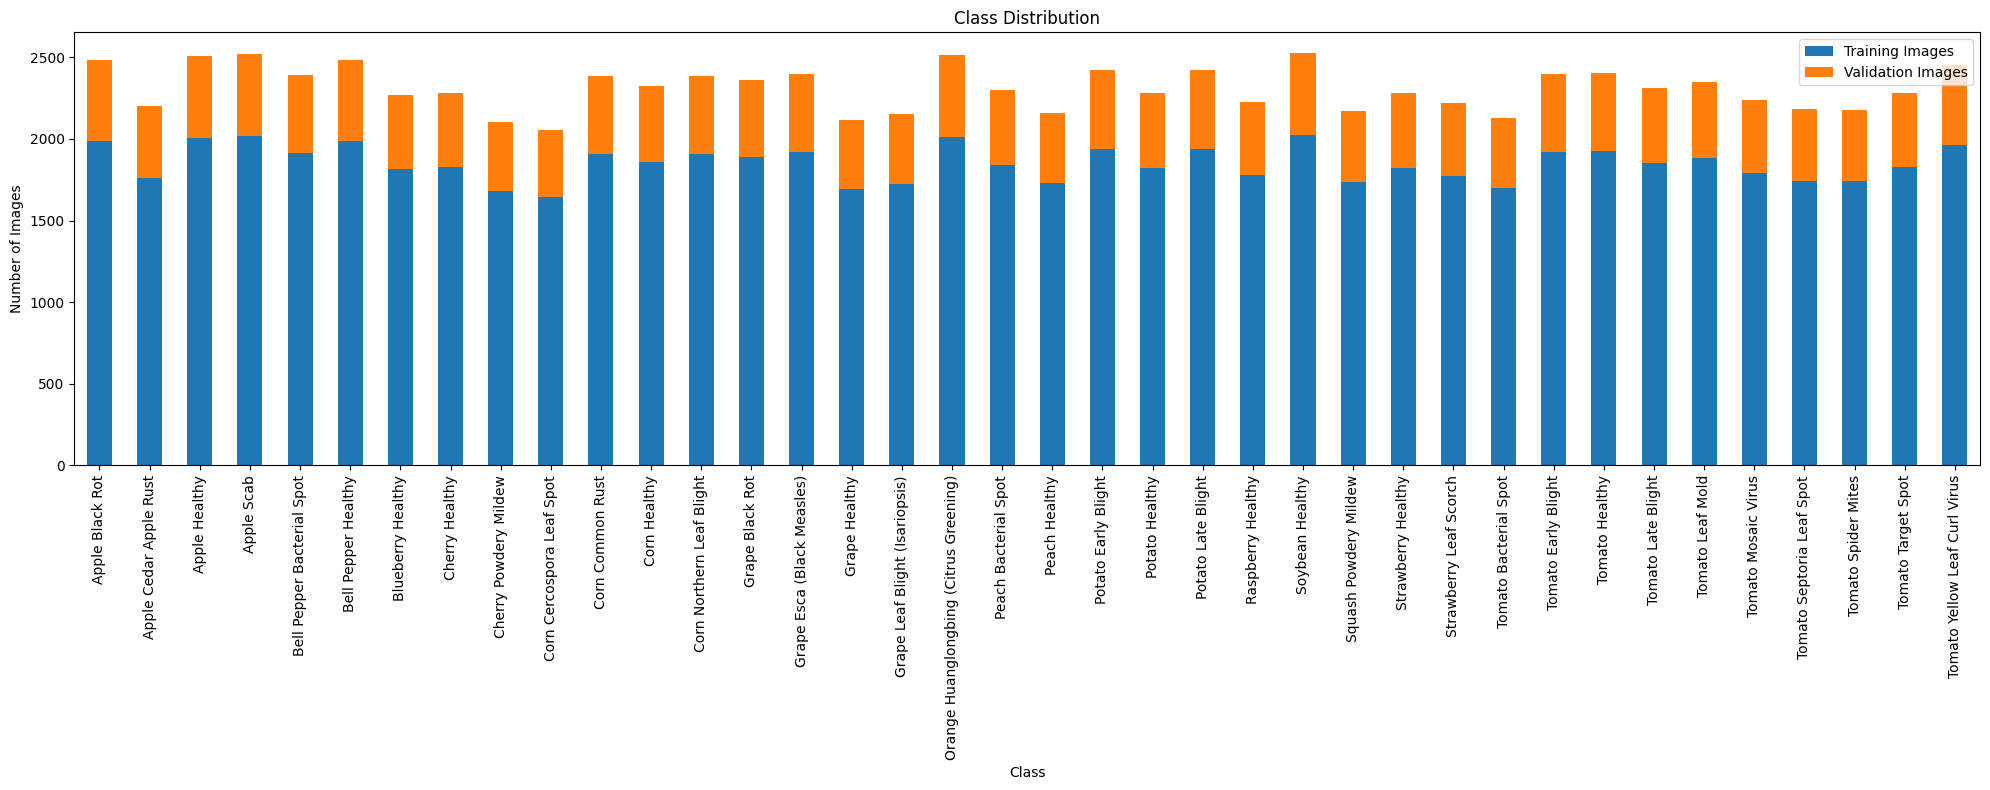

In [11]:
# Plot the class distribution with adjustments for readability
df.plot(
    x="Class", kind="bar", stacked=True, figsize=(20, 8), title="Class Distribution"
)
plt.ylabel("Number of Images")
plt.xlabel("Class")

# Rotate x-ticks for better readability
plt.xticks(rotation=90, ha="center")

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
# Function to visualize one image per class
def visualize_sample_images(dataset_dir):
    """
    Visualizes one sample image per class in the dataset directory.

    Args:
        dataset_dir (str): The path to the dataset directory.

    Displays a grid of images, with one image per class, using matplotlib.
    """
    class_names = os.listdir(dataset_dir)
    class_names.sort()  # Sort for consistent order

    # Calculate the number of rows and columns for the subplot grid
    num_classes = len(class_names)
    num_cols = 5  # You can adjust this number
    num_rows = math.ceil(num_classes / num_cols)

    plt.figure(figsize=(num_cols * 3, num_rows * 3))
    for i, class_name in enumerate(class_names, start=1):
        class_path = os.path.join(dataset_dir, class_name)
        image_path = os.path.join(
            class_path, os.listdir(class_path)[0]
        )  # Get the first image in the class
        img = plt.imread(image_path)

        plt.subplot(num_rows, num_cols, i)  # Adjust grid size dynamically
        plt.imshow(img)
        plt.title(CLASS_NAME_MAPPING.get(class_name))
        plt.axis("off")

    plt.tight_layout()
    plt.show()

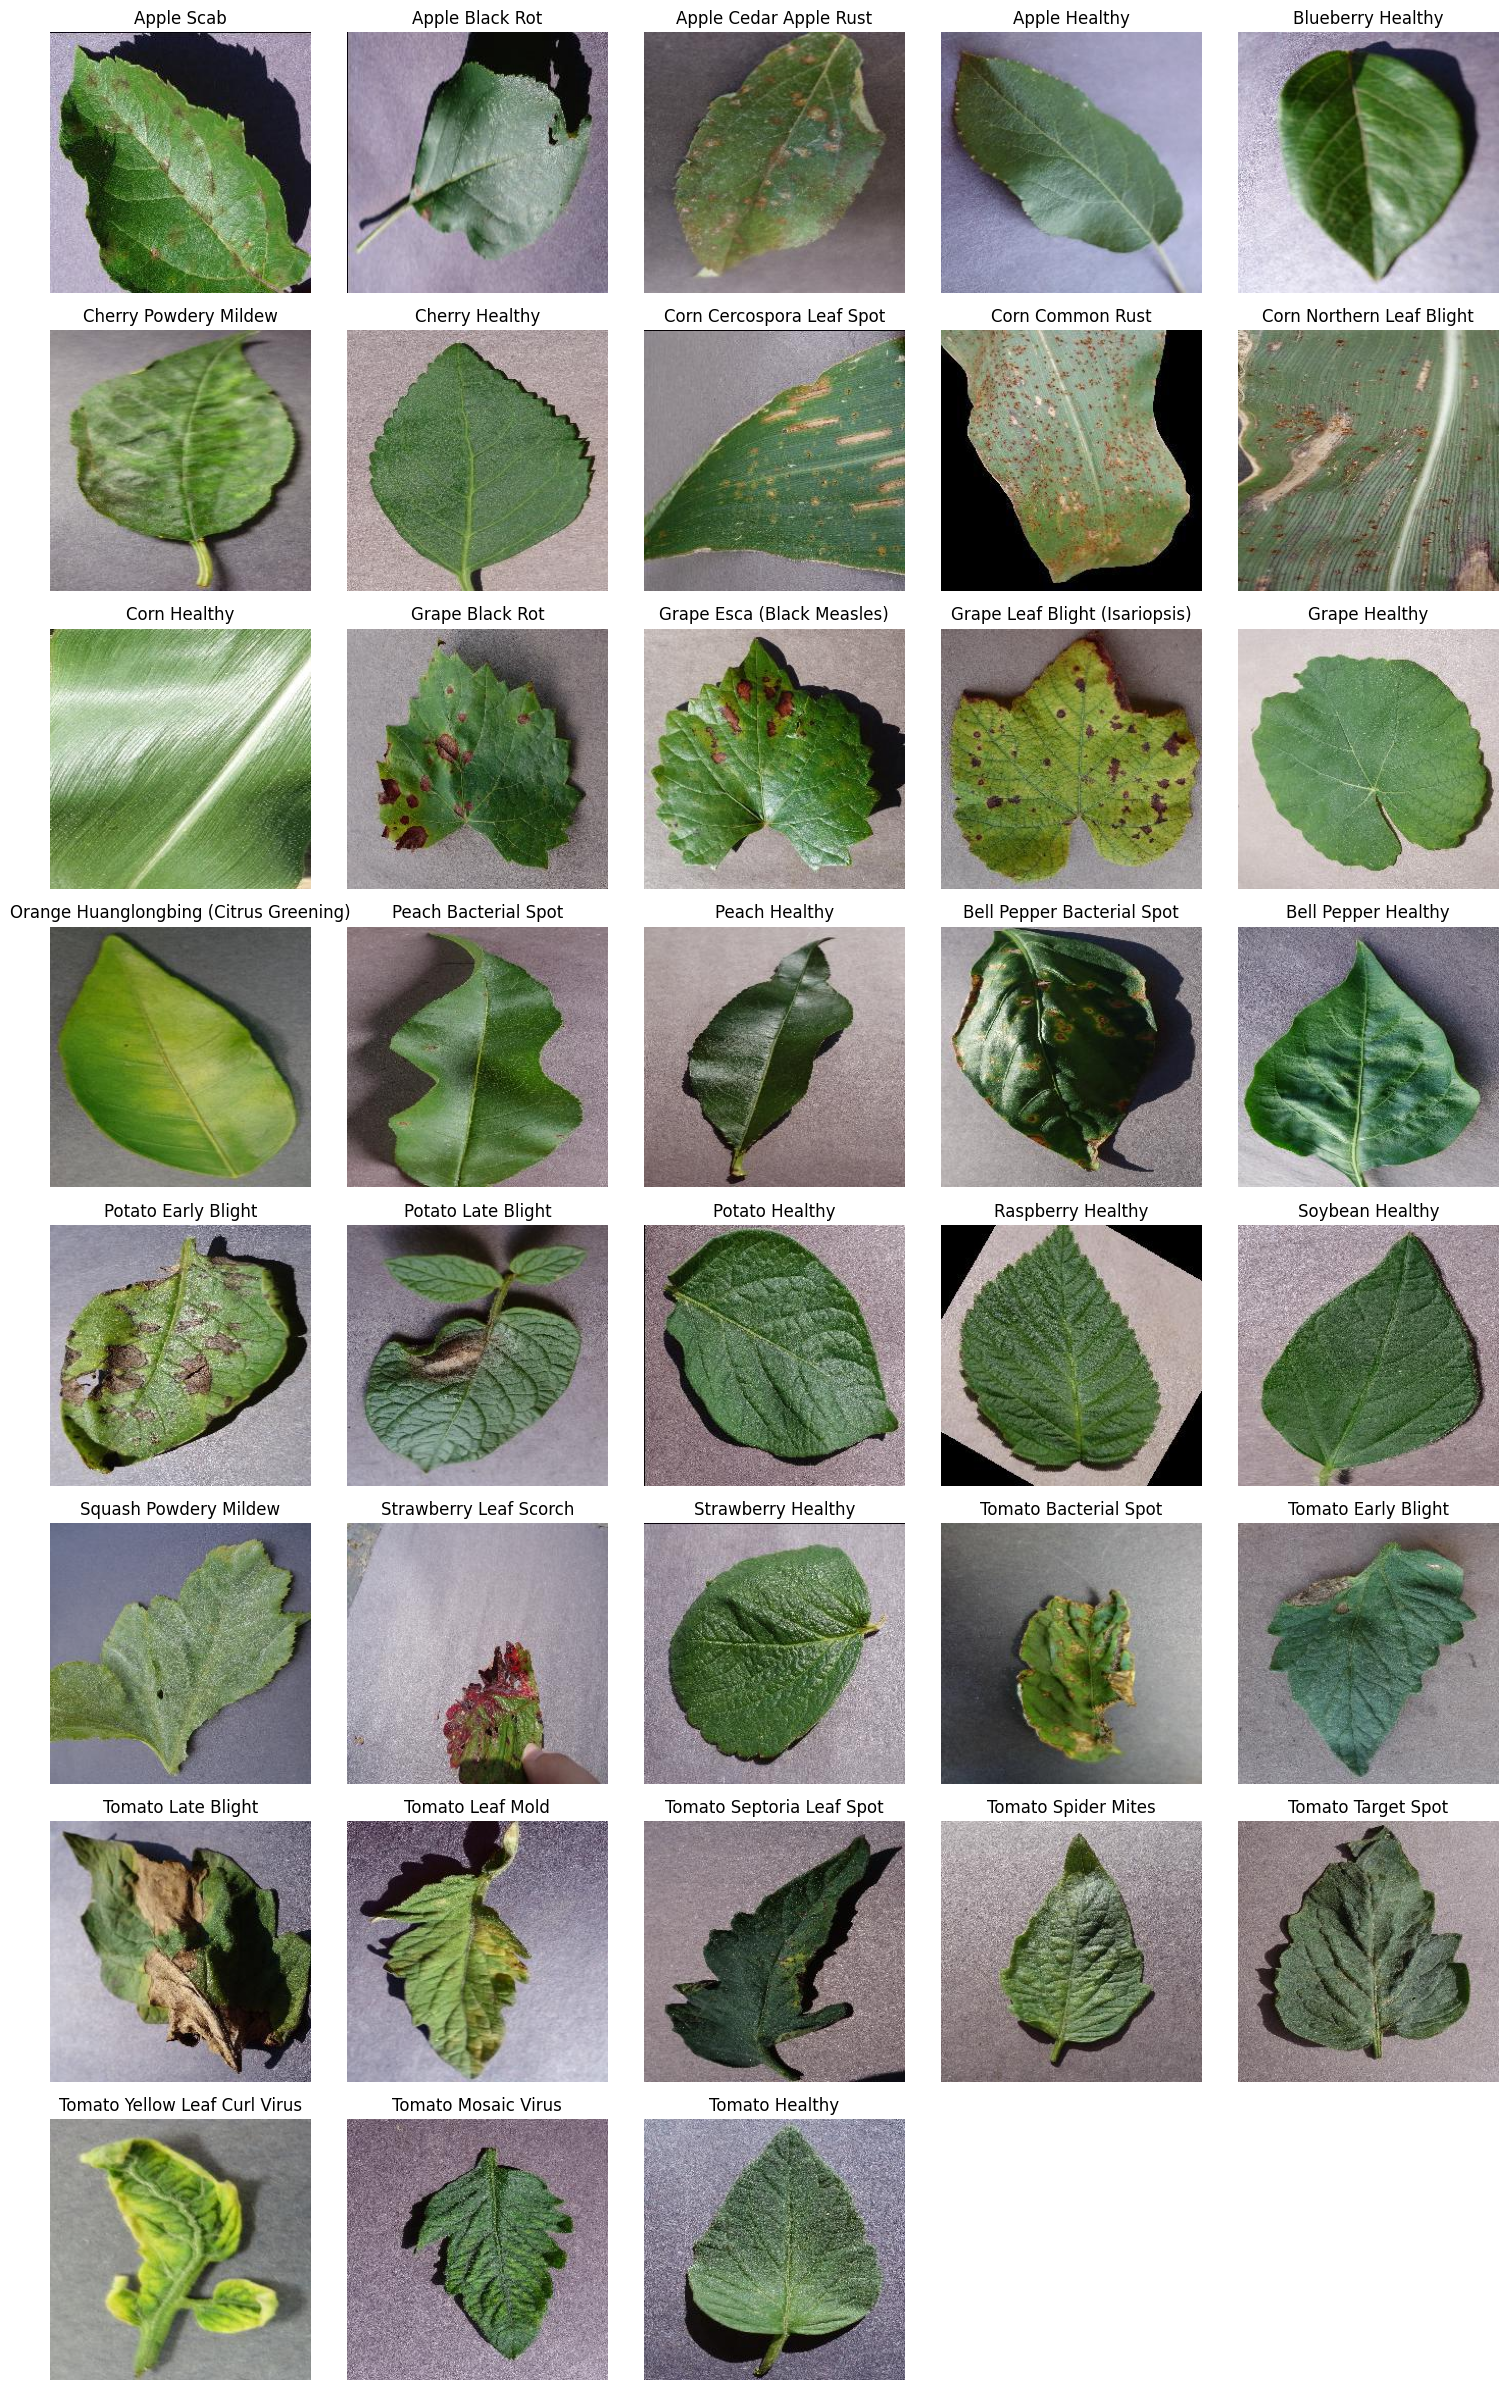

In [13]:
# Visualize sample images from training set
visualize_sample_images(TRAIN_DIR)

### Image Preprocessing

#### Normalization

In [14]:
normalize = tf.keras.layers.Rescaling(1.0 / 255)

# Apply normalization on both Training and Validation set
normalized_training_set = training_set.map(lambda x, y: (normalize(x), y))
normalized_validation_set = validation_set.map(lambda x, y: (normalize(x), y))

#### Image Augmentation

In [15]:
data_augmentation = Sequential(
    [
        # Brightness adjustment
        tf.keras.layers.RandomBrightness(
            factor=(-0.1, 0.1),
            value_range=(0.0, 1.0),
        ),  # Adjust brightness by ±20%
        # Contrast adjustment
        tf.keras.layers.RandomContrast(factor=0.7),  # Adjust contrast by ±20%
        # Rotation
        tf.keras.layers.RandomRotation(
            factor=0.2,
            fill_mode="constant",
            fill_value=0.0,
        ),  # Rotate by ±10% (36°)
        # Horizontal and vertical flips
        tf.keras.layers.RandomFlip(
            mode="horizontal_and_vertical"
        ),  # Flip both horizontally and vertically
        # Zoom
        tf.keras.layers.RandomZoom(
            height_factor=(-0.2, 0.2),
            width_factor=(-0.2, 0.2),
            fill_mode="constant",
            fill_value=0.0,
        ),  # Zoom in/out by 20%
        # Gaussian noise
        tf.keras.layers.GaussianNoise(stddev=0.01),  # Add Gaussian noise
    ]
)

# Apply augmentation to the training set
# augmented_training_set = normalized_training_set.map(
#     lambda x, y: (data_augmentation(x), y)
# )

augmented_training_set = normalized_training_set

#### Image Enhancement (not implemented)

In [16]:
# Image Enhancements have not strongly proven to increase the accuracy

#### Image Preprocessing Details

##### Augmentation Details

In [17]:
# Test the augmentation pipeline with individual augmentations
def visualize_individual_augmentations(image_path):
    """
    Visualizes the effect of individual augmentations on an input image.

    Args:
        image_path (str): The path to the input image.

    Applies a series of individual augmentations to the input image and displays the results in a grid.
    """
    # Load and preprocess the image
    image = load_img(image_path, target_size=(128, 128))  # Adjust to your image size
    image_array = img_to_array(image) / 255.0  # Normalize to [0, 1]
    image_array = tf.expand_dims(image_array, axis=0)  # Add batch dimension

    # Define individual augmentation layers
    augmentations = [
        ("Original", None),
        (
            "Random Brightness",
            tf.keras.layers.RandomBrightness(
                factor=(-0.2, 0.2),
                value_range=(0.0, 1.0),
            ),
        ),
        ("Random Contrast", tf.keras.layers.RandomContrast(factor=0.5)),
        (
            "Random Rotation",
            tf.keras.layers.RandomRotation(
                factor=0.2,
                fill_mode="constant",
                fill_value=0.0,
            ),
        ),
        ("Random Flip", tf.keras.layers.RandomFlip(mode="horizontal_and_vertical")),
        (
            "Random Zoom",
            tf.keras.layers.RandomZoom(
                height_factor=(-0.2, 0.2),
                width_factor=(-0.2, 0.2),
                fill_mode="constant",
                fill_value=0.0,
            ),
        ),
        ("Gaussian Noise", tf.keras.layers.GaussianNoise(stddev=0.01)),
    ]

    # Apply each augmentation and plot
    plt.figure(figsize=(20, 5))
    for i, (title, layer) in enumerate(augmentations, start=1):
        if layer is None:
            augmented_image = image_array[0]
        else:
            augmented_image = layer(image_array)[0]

        plt.subplot(1, len(augmentations), i)
        plt.imshow(augmented_image.numpy())
        plt.title(title)
        plt.axis("off")

    plt.show()

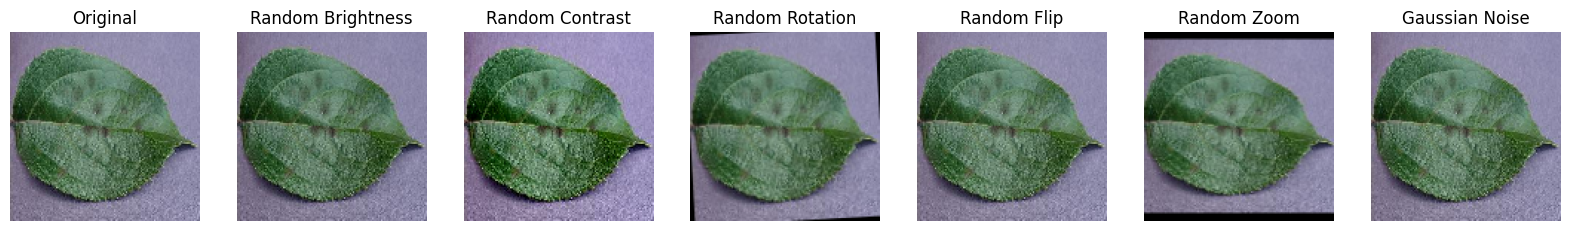

In [18]:
# Visualize individual augmentation techniques
visualize_individual_augmentations(SAMPLE_IMAGE)

In [19]:
# Test the augmentation pipeline with a sample image
def visualize_augmentation(image_path):
    """
    Visualizes the effect of the augmentation pipeline on a sample image.

    Args:
        image_path (str): The path to the input image.

    Applies the augmentation pipeline to the input image and displays the original image alongside 5 augmented versions.
    """

    # Load and preprocess the image
    image = load_img(image_path, target_size=(128, 128))  # Adjust to your image size
    image_array = img_to_array(image) / 255.0  # Normalize to [0, 1]
    image_array = tf.expand_dims(image_array, axis=0)  # Add batch dimension

    # Apply augmentations
    augmented_images = [data_augmentation(image_array)[0] for _ in range(5)]

    # Plot original and augmented images
    plt.figure(figsize=(15, 3))
    plt.subplot(1, 6, 1)
    plt.imshow(image_array[0])
    plt.title("Original")
    plt.axis("off")

    for i, aug_img in enumerate(augmented_images, start=2):
        plt.subplot(1, 6, i)
        plt.imshow(aug_img.numpy())
        plt.title(f"Augmented {i-1}")
        plt.axis("off")
    plt.show()

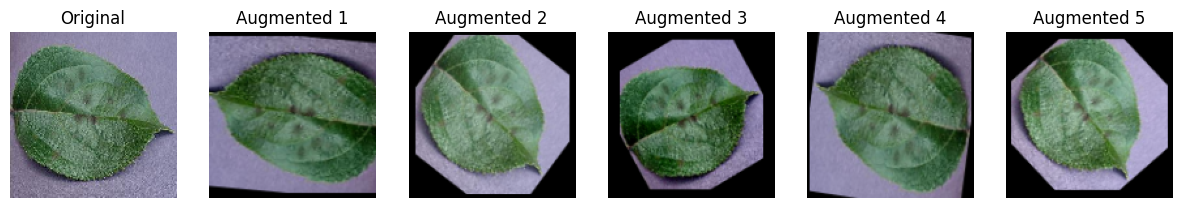

In [20]:
# Visualize the Original vs Augmented Image
visualize_augmentation(SAMPLE_IMAGE)

### Training Model

#### Building Model

In [21]:
def add_conv_block(
    model,
    filters,
    kernel_size=3,
    pool_size=2,
    strides=2,
    activation="relu",
    padding="same",
):
    """
    Adds a convolutional block to the model, consisting of:
    - Conv2D layer
    - Conv2D layer
    - MaxPooling layer

    Parameters:
        model: Sequential model to which the block is added.
        filters: Number of filters for Conv2D layers.
        kernel_size: Size of the convolutional kernel (default: 3).
        pool_size: Pool size for MaxPooling (default: 2).
        strides: Strides for MaxPooling (default: 2).
        activation: Activation function for Conv2D layers (default: 'relu').
        padding: Padding for Conv2D layers (default: 'same').
    """
    model.add(
        Conv2D(
            filters=filters,
            kernel_size=kernel_size,
            padding=padding,
            activation=activation,
        )
    )
    model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation=activation))
    model.add(MaxPool2D(pool_size=pool_size, strides=strides))

In [22]:
# Initialize the model
model = Sequential()

In [23]:
# Input layer and first convolutional block
model.add(
    Conv2D(
        filters=32,
        kernel_size=3,
        padding="same",
        activation="relu",
        input_shape=[128, 128, 3],
    )
)
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/home/sam5io/sam_engineerings/AgroDiagnoseAI/.AgroDiagnoseAI_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Add subsequent convolutional blocks using the function
add_conv_block(model, filters=64)
add_conv_block(model, filters=128)
add_conv_block(model, filters=256)
add_conv_block(model, filters=512)

In [25]:
# Add the fully connected layers
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=1500, activation="relu"))
model.add(Dropout(0.4))

In [26]:
# Output Layer
model.add(Dense(units=38, activation="softmax"))

#### Compiling Model

In [27]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

#### Training Model

In [28]:
training_history = model.fit(
    x=augmented_training_set, validation_data=normalized_validation_set, epochs=10
)

Epoch 1/10


I0000 00:00:1738056160.245349   53440 service.cc:148] XLA service 0xedea0d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738056160.245929   53440 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
I0000 00:00:1738056160.837868   53440 cuda_dnn.cc:529] Loaded cuDNN version 90300


   1/2197 ━━━━━━━━━━━━━━━━━━━━ 6:46:30 11s/step - accuracy: 0.0000e+00 - loss: 3.6383

I0000 00:00:1738056168.675446   53440 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 110s 45ms/step - accuracy: 0.2643 - loss: 2.6316 - val_accuracy: 0.7532 - val_loss: 0.7857
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 89s 41ms/step - accuracy: 0.7596 - loss: 0.7659 - val_accuracy: 0.8701 - val_loss: 0.4037
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 90s 41ms/step - accuracy: 0.8602 - loss: 0.4343 - val_accuracy: 0.9049 - val_loss: 0.2901
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 90s 41ms/step - accuracy: 0.8998 - loss: 0.2997 - val_accuracy: 0.9255 - val_loss: 0.2257
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 90s 41ms/step - accuracy: 0.9248 - loss: 0.2281 - val_accuracy: 0.9346 - val_loss: 0.1920
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 90s 41ms/step - accuracy: 0.9418 - loss: 0.1707 - val_accuracy: 0.9326 - val_loss: 0.2141
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 90s 41ms/step - accuracy: 0.9530 - loss: 0.1380 - val_accuracy: 0.9490 - val_loss: 0.1518
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 91s 41ms/step - accuracy: 0.9626 - loss: 0.1

#### Evaluating Model

In [29]:
# Training set Accuracy
train_loss, train_acc = model.evaluate(augmented_training_set)
print("Training accuracy:", train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.9911 - loss: 0.0299
Training accuracy: 0.9914076328277588


In [30]:
# Validation set Accuracy
val_loss, val_acc = model.evaluate(normalized_validation_set)
print("Validation accuracy:", val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9609 - loss: 0.1220
Validation accuracy: 0.9625540375709534


#### Saving Model

In [31]:
model.save(f'../models/{MODEL_NAME}.keras')

In [32]:
# Save the training history
with open("training_history.json", "w") as f:
    json.dump(training_history.history, f)

#### Model Details

##### Model Architecture

In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

##### Model Performance Metrics

In [53]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    VALID_DIR,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


normalized_validation_set = validation_set.map(
    lambda x, y: (normalize(x), y)
)

Found 17572 files belonging to 38 classes.


In [54]:
# Get true labels
# y_true = np.concatenate([y.numpy() for _, y in validation_set], axis=0)

# if y_true.ndim > 1:  # If it's one-hot encoded
#     y_true = np.argmax(y_true, axis=1)

# print(f"y_true shape: {y_true.shape}")

y_true = tf.concat([y for _, y in validation_set], axis=0)

# if y_true.ndim > 1:  # If it's one-hot encoded
y_true = tf.argmax(y_true, axis=1)

print(f"y_true shape: {y_true.shape}")

y_true shape: (17572,)


In [55]:
# Predict labels using the trained model
y_pred = model.predict(normalized_validation_set)

# if y_pred.ndim > 1:  # If it's one-hot encoded or probabilities
#     y_pred = np.argmax(y_pred, axis=1)

# if y_pred.ndim > 1:  # If it's one-hot encoded or probabilities
y_pred = tf.argmax(y_pred, axis=1)

print(f"y_pred shape: {y_pred.shape}")

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step
y_pred shape: (17572,)


In [56]:
print(MAPPED_CLASS_NAMES())

['Apple Scab', 'Apple Black Rot', 'Apple Cedar Apple Rust', 'Apple Healthy', 'Blueberry Healthy', 'Cherry Powdery Mildew', 'Cherry Healthy', 'Corn Cercospora Leaf Spot', 'Corn Common Rust', 'Corn Northern Leaf Blight', 'Corn Healthy', 'Grape Black Rot', 'Grape Esca (Black Measles)', 'Grape Leaf Blight (Isariopsis)', 'Grape Healthy', 'Orange Huanglongbing (Citrus Greening)', 'Peach Bacterial Spot', 'Peach Healthy', 'Bell Pepper Bacterial Spot', 'Bell Pepper Healthy', 'Potato Early Blight', 'Potato Late Blight', 'Potato Healthy', 'Raspberry Healthy', 'Soybean Healthy', 'Squash Powdery Mildew', 'Strawberry Leaf Scorch', 'Strawberry Healthy', 'Tomato Bacterial Spot', 'Tomato Early Blight', 'Tomato Late Blight', 'Tomato Leaf Mold', 'Tomato Septoria Leaf Spot', 'Tomato Spider Mites', 'Tomato Target Spot', 'Tomato Yellow Leaf Curl Virus', 'Tomato Mosaic Virus', 'Tomato Healthy']


In [57]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame(
    {
        "True Labels": y_true[:50],  # Take the first 50 rows of true labels
        "Predicted Labels": y_pred[:50],  # Take the first 50 rows of predicted labels
    }
)

# Display the table
print(comparison_df)

    True Labels  Predicted Labels
0             0                 0
1             0                 0
2             0                 0
3             0                 0
4             0                 0
5             0                 0
6             0                 0
7             0                 0
8             0                 0
9             0                 0
10            0                 0
11            0                 0
12            0                 0
13            0                 0
14            0                 0
15            0                 0
16            0                 0
17            0                 0
18            0                 0
19            0                 0
20            0                 0
21            0                 0
22            0                 0
23            0                 0
24            0                 0
25            0                 0
26            0                 0
27            0                 0
28            

In [58]:
# Generate the classification report
report = classification_report(
    y_true, y_pred, target_names=validation_set.class_names
)

print("Classification Report:")
print(report)

Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.95      0.95       504
                                 Apple___Black_rot       0.97      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.95      0.97      0.96       440
                                   Apple___healthy       0.95      0.94      0.95       502
                               Blueberry___healthy       0.87      0.98      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.91      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight      

##### Model Confusion Matrix

In [59]:
def plot_confusion_matrix_heatmap(model, validation_set):
    """
    Plots the confusion matrix as a heatmap for a given model and validation dataset.
    Uses human-readable class names for display.

    Parameters:
        model: Trained model.
        validation_set: Validation dataset (normalized and preprocessed).
    """
    # Get true labels and predictions
    true_labels = np.concatenate([y for x, y in validation_set], axis=0)
    predicted_probs = model.predict(validation_set)

    # If true_labels are one-hot encoded, convert them to class indices
    if true_labels.ndim > 1:  # Check if one-hot encoded
        true_labels = np.argmax(true_labels, axis=1)

    # Convert predicted probabilities to class indices
    predicted_labels = np.argmax(predicted_probs, axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Map the class names to human-readable format
    class_names = MAPPED_CLASS_NAMES()

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(40, 40))
    sns.heatmap(
        cm,
        annot=True,
        annot_kws={"size": 10},
        cmap="magma",
        xticklabels=class_names,
        yticklabels=class_names,
    )

    plt.xlabel("Predicted Class", fontsize=20)
    plt.ylabel("Actual Class", fontsize=20)
    plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)
    plt.show()

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step


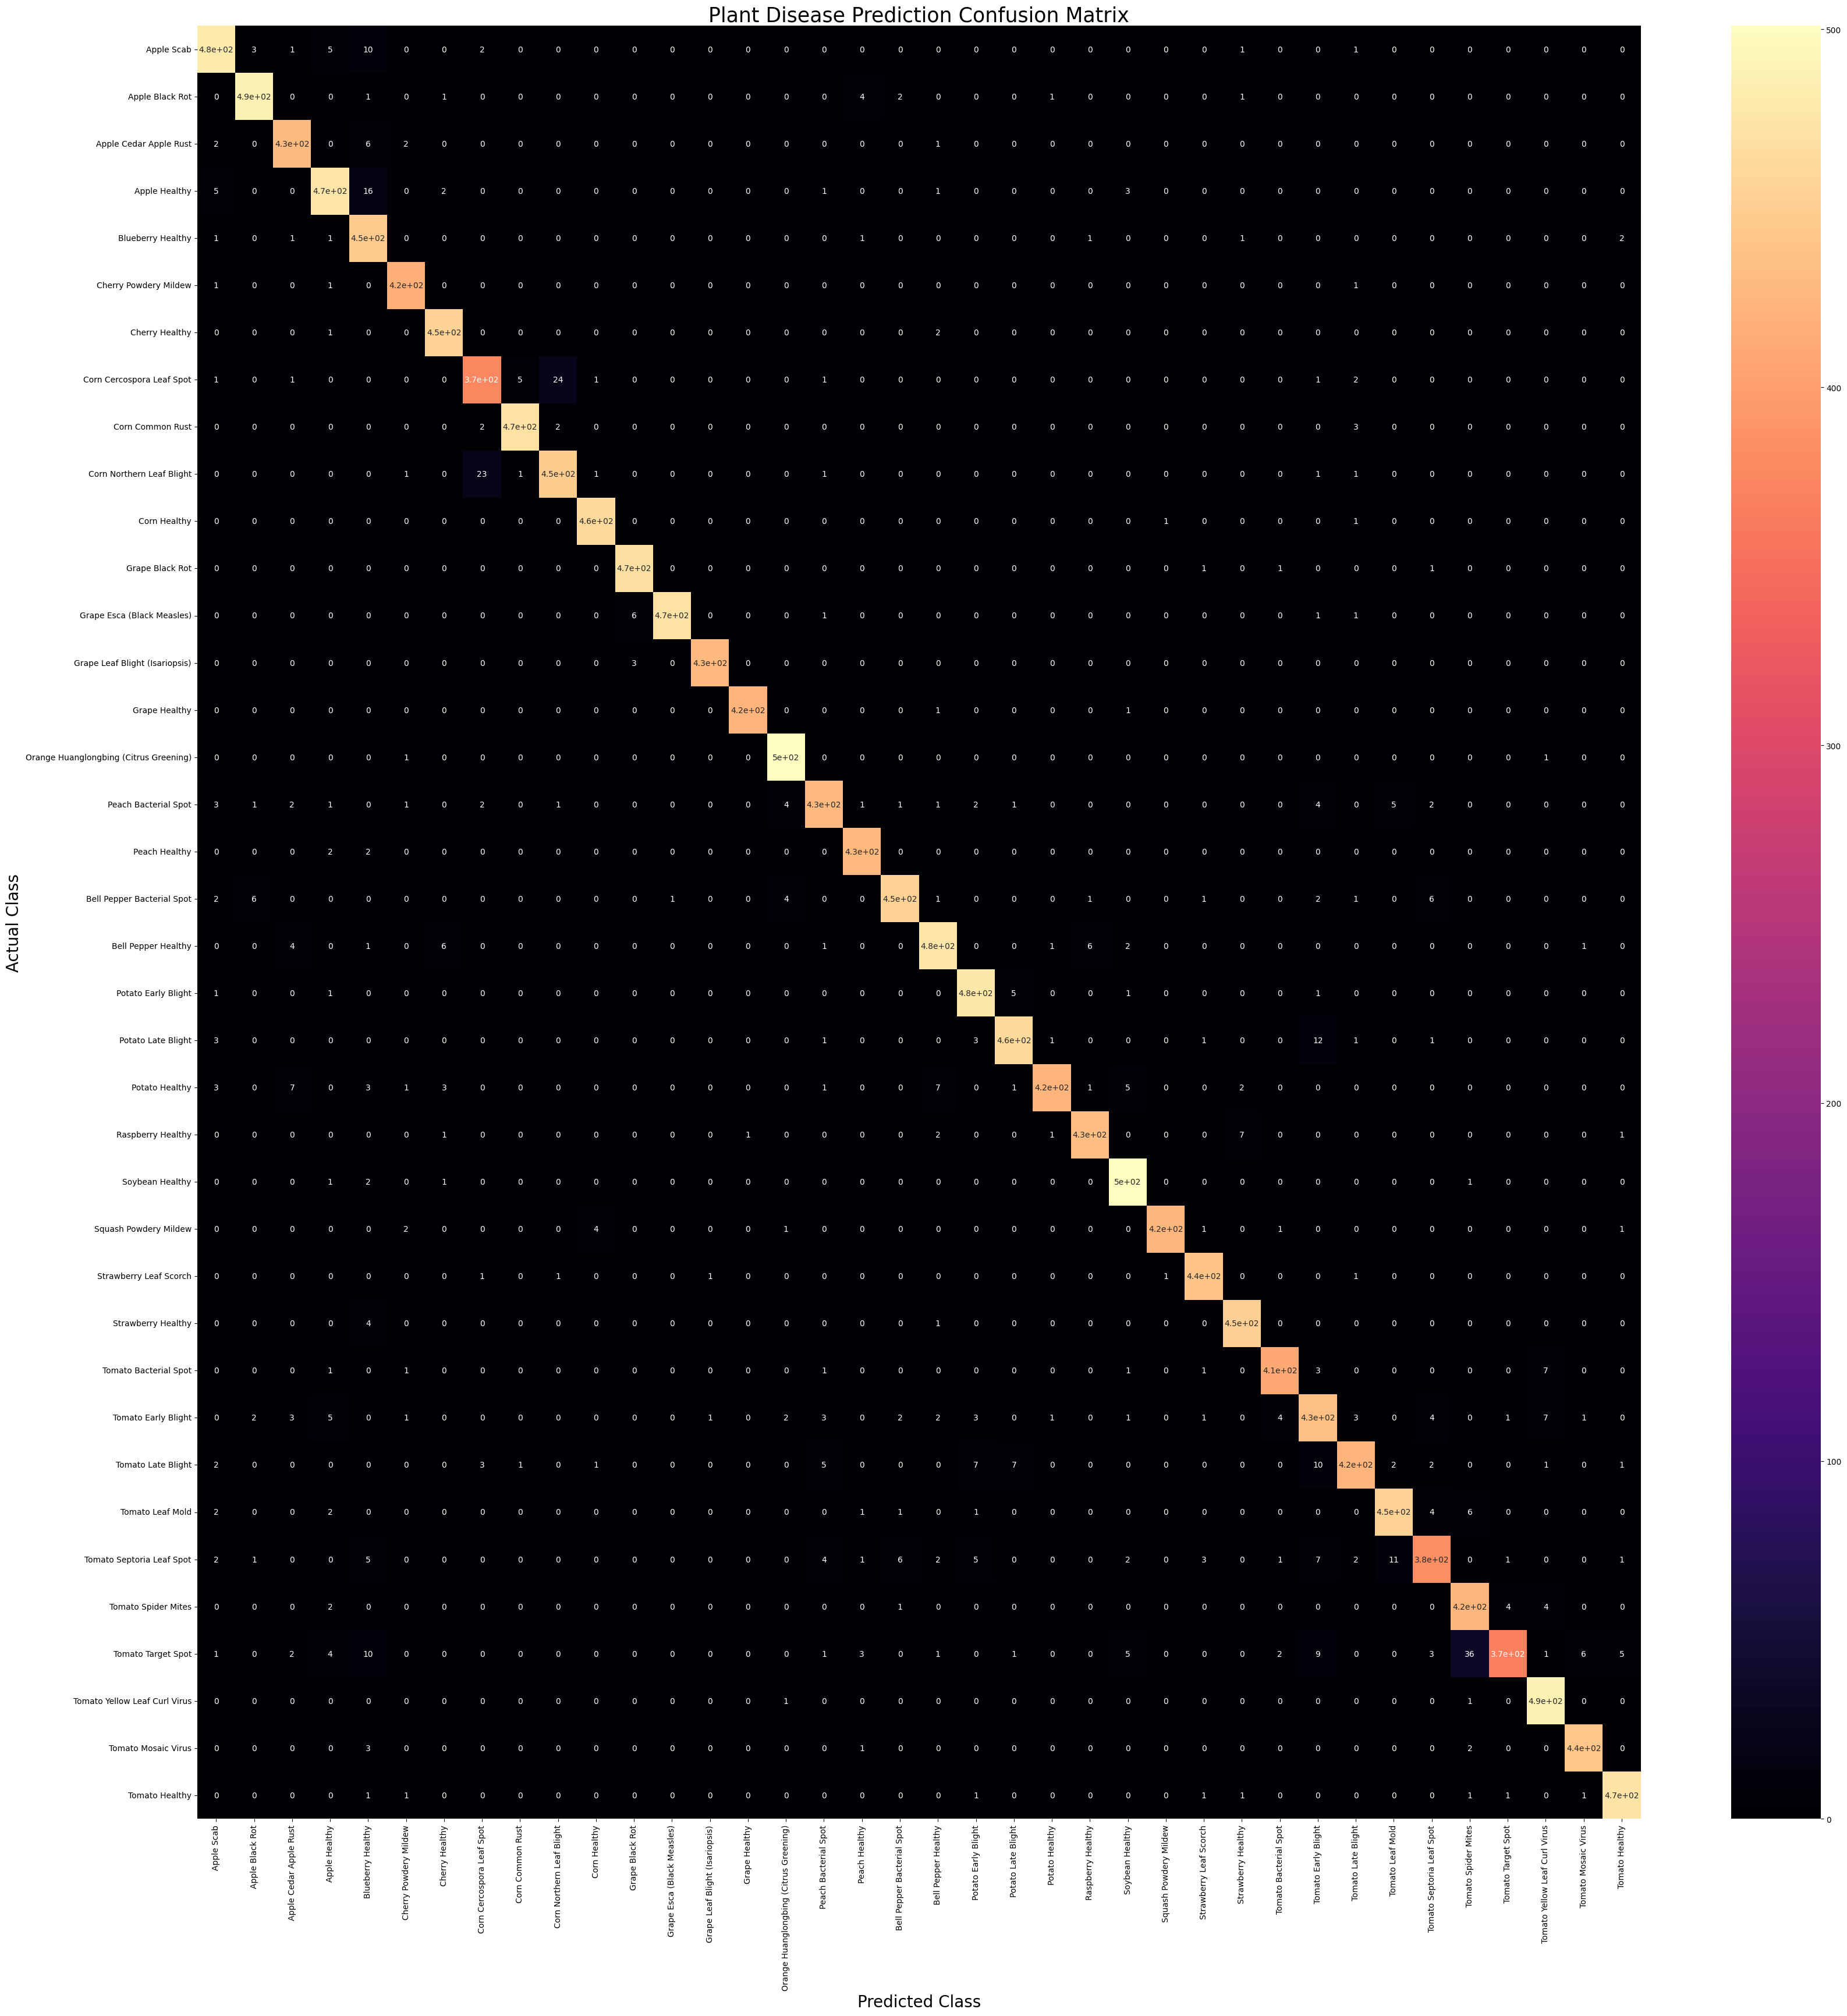

In [60]:
# Example usage
# class_names = validation_set.class_names  # Assuming your dataset has class names
plot_confusion_matrix_heatmap(model, normalized_validation_set)

In [ ]:
cm = confusion_matrix(y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_name))

##### Train | Valid Accuracy & Loss graph

In [41]:
def plot_training_history(history):
    """
    Plots training and validation accuracy and loss graphs.

    Parameters:
        history: The History object returned by model.fit().
    """
    # Extract metrics
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label="Training Accuracy")
    plt.plot(epochs, val_acc, label="Validation Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label="Training Loss")
    plt.plot(epochs, val_loss, label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

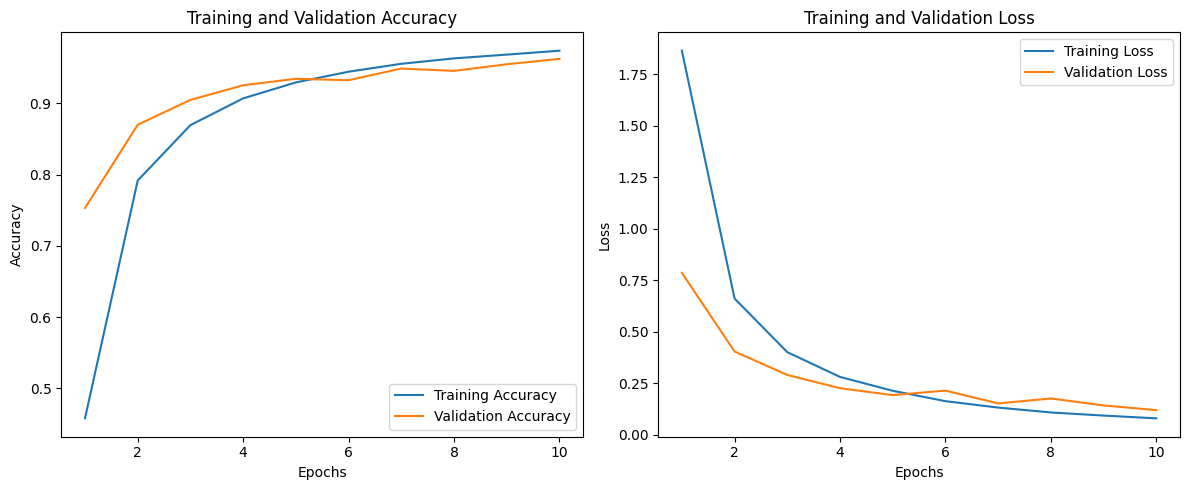

In [42]:
# Plot the graphs
plot_training_history(training_history)

## Conclusion

This notebook provides a comprehensive template for training a CNN model for image classification. It includes dataset preparation, preprocessing, augmentation, model building, training, evaluation, and visualization. Once executed, it is expected to deliver a functional model for plant disease classification. However, adding hyperparameter tuning and overfitting mitigation strategies could further improve its utility.

Areas for Improvement:

The notebook lacks details about hyperparameter tuning. Including experiments with different learning rates or optimizers could enhance it.
While the augmentation techniques are detailed, their effectiveness on model performance is not quantified.
Consider adding a section on overfitting prevention strategies like early stopping or learning rate scheduling.